In [1]:
%matplotlib inline
from sklearn.datasets import fetch_lfw_people, get_data_home
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# fetch_lfw_people?
# train_test_split?
# RandomizedPCA?

fetch_lfw_people(data_home=None, funneled=True, resize=0.5, min_faces_per_person=0, color=False, slice_=(slice(70, 195, None), slice(78, 172, None)), download_if_missing=True)

return:
- dataset.images : numpy array of shape (13233, 62, 47)
    Each row is a face image corresponding to one of the 5749 people in
    the dataset. Changing the ``slice_`` or resize parameters will change
    the shape of the output.

- dataset.target : numpy array of shape (13233,)
    Labels associated to each face image. Those labels range from 0-5748
    and correspond to the person IDs.

In [3]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [4]:
# 默认数据集存放路径
get_data_home()

'/home/cgf/scikit_learn_data'

In [5]:
n_samples, height, width = lfw_people.images.shape

In [6]:
print('n_samples:', n_samples)
print('height:{}, width:{}'.format(height, width))

('n_samples:', 1288)
height:50, width:37


In [7]:
n_classes = lfw_people.target.shape

In [8]:
print('n_classes:', n_classes)

('n_classes:', (1288,))


In [9]:
X_train, X_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target, test_size=0.25, random_state=42)

In [10]:
# 数据预处理，缩放到[0-1]
# X_train = (X_train - 255.0)/255.0+1
# X_test = (X_test - 255.0)/255.0+1
X_train = scale(X_train)
X_test = scale(X_test)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [11]:
select_pca_n_components = width*height
select_pca = RandomizedPCA(n_components=select_pca_n_components, whiten=True)
select_pca.fit(X_train)
select_pca_eigens = select_pca.explained_variance_
for k in range(select_pca_n_components, 0, -1):
    top_k_eigens = select_pca_eigens[0:k]
    top_k_rate = np.sum(top_k_eigens)/np.sum(select_pca_eigens)
    if top_k_rate <= 0.96:
        print('k:', k)
        break

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


('k:', 161)


In [12]:
pca_n_components = 150

In [13]:
pca = RandomizedPCA(n_components=pca_n_components, whiten=True)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
pca.fit(X_train)

RandomizedPCA(copy=True, iterated_power=2, n_components=150,
       random_state=None, whiten=True)

In [15]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
# 每一个组件，(n_components, X.shape)
eigenfaces = pca.components_.reshape(pca_n_components, width, height)

In [17]:
n_train_samples = X_train_pca.shape[0]

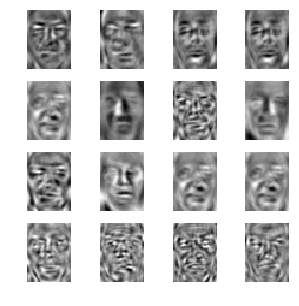

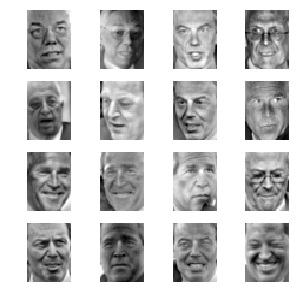

In [18]:
vis_col = 4
vis_row = 4
vis_num = vis_col * vis_row
vis_rand_id = np.random.choice(n_train_samples, vis_num)
vis_rand_eigen_id = np.random.choice(pca_n_components, vis_num)
vis_eigen = eigenfaces[vis_rand_eigen_id, :, :]
vis_X_train = X_train[vis_rand_id, :]
plt.figure(figsize=(5, 5))
for row in range(vis_row):
    for col in range(vis_col):
        vis_id = vis_row*row+col
#         print('vis_id:', vis_id)
        vis_x = vis_eigen[vis_id]
#         print('vis_x:', vis_x)
        vis_x_image = vis_x.reshape(height, width)
        plt.subplot(vis_col, vis_row, vis_id+1)
        plt.imshow(vis_x_image, cmap='gray')
        plt.axis('off')
plt.figure(figsize=(5, 5))
for row in range(vis_row):
    for col in range(vis_col):
        vis_id = vis_row*row+col
#         print('vis_id:', vis_id)
        vis_x = vis_X_train[vis_id]
#         print('vis_x:', vis_x)
        vis_x_image = vis_x.reshape(height, width)
        plt.subplot(vis_col, vis_row, vis_id+1)
        plt.imshow(vis_x_image, cmap='gray')
        plt.axis('off')

In [19]:
clf = SVC(kernel='rbf', class_weight='balanced')

In [20]:
clf.fit(X_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
clf.score(X_test_pca, y_test)

0.88198757763975155

In [22]:
np.max(X_train)

3.9746785

In [23]:
np.min(X_train)

-5.6356597

In [24]:
np.max(X_train_pca)

7.2799400250460877

In [25]:
np.min(X_train_pca)

-4.9993582094387303